In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df = df.rename(columns={'RegionName': 'zipcode'})

In [5]:
df['zipcode'] = df['zipcode'].astype(str).str.zfill(5)

In [6]:
df['five_year'] = ((df['2018-04']/df['2013-04'])-1)*100

In [7]:
df.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,26.082701
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,310000,312500,314100,315000,316600,318100,319600,321100,321800,53.384175
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320600,320200,320400,320800,321200,321200,323000,326900,329900,28.315830
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,25.878840
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119400,120000,120300,120300,120300,120300,120500,121000,121500,7.048458


In [8]:
df[['zipcode','City','State','five_year']].sort_values(by=['five_year'],ascending=False).head(20)

,zipcode,City,State,five_year
7302,80216,Denver,CO,173.872951
1477,94601,Oakland,CA,167.943262
5830,48240,Redford,MI,161.224490
1239,94590,Vallejo,CA,159.379310
2661,33705,Saint Petersburg,FL,159.210526
6105,37210,Nashville,TN,155.932203
2627,33460,Lake Worth,FL,153.647059
6563,15201,Pittsburgh,PA,147.593583
475,11216,New York,NY,147.591761
1835,37207,Nashville,TN,146.683047


In [9]:
lake_worth = df.loc[df['zipcode'] == '15201']

In [10]:
lake_worth.head()

,RegionID,zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year
6563,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564,34400.0,34600.0,34700.0,...,164400,166100,167600,169000,170400,171400,173900,179700,185200,147.593583


In [11]:
lake_worth = lake_worth.iloc[:,7:-1]

In [12]:
lake_worth.head()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6563,34400.0,34600.0,34700.0,34700.0,34800.0,34800.0,34700.0,34700.0,34600.0,34500.0,...,162300,164400,166100,167600,169000,170400,171400,173900,179700,185200


In [13]:
lake_worth = lake_worth.T

In [14]:
lake_worth.head()

,6563
1996-04,34400.0
1996-05,34600.0
1996-06,34700.0
1996-07,34700.0
1996-08,34800.0


In [15]:
type(lake_worth)

pandas.core.frame.DataFrame

In [16]:
lake_worth = lake_worth.rename(columns={6563:'home price'})

In [17]:
lake_worth.head()

,home price
1996-04,34400.0
1996-05,34600.0
1996-06,34700.0
1996-07,34700.0
1996-08,34800.0


In [18]:
lake_worth.index = lake_worth.index.astype('datetime64[ns]')

In [19]:
lake_worth.index.dtype

dtype('<M8[ns]')

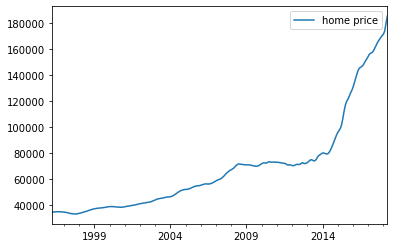

In [20]:
lake_worth.plot();

In [21]:
lake_worth['diff'] = lake_worth.diff()

In [22]:
lake_worth.head()

,home price,diff
1996-04-01,34400.0,NaN
1996-05-01,34600.0,200.0
1996-06-01,34700.0,100.0
1996-07-01,34700.0,0.0
1996-08-01,34800.0,100.0


In [23]:
lake_worth['home price shifted'] = lake_worth['home price'].shift()

In [24]:
lake_worth.tail()

,home price,diff,home price shifted
2017-12-01,170400.0,1400.0,169000.0
2018-01-01,171400.0,1000.0,170400.0
2018-02-01,173900.0,2500.0,171400.0
2018-03-01,179700.0,5800.0,173900.0
2018-04-01,185200.0,5500.0,179700.0


In [25]:
lake_worth['pct'] = lake_worth['diff']/lake_worth['home price shifted']

In [26]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-04-01,34400.0,NaN,NaN,NaN
1996-05-01,34600.0,200.0,34400.0,0.005814
1996-06-01,34700.0,100.0,34600.0,0.002890
1996-07-01,34700.0,0.0,34700.0,0.000000
1996-08-01,34800.0,100.0,34700.0,0.002882


In [27]:
lake_worth = lake_worth.dropna()

In [28]:
lake_worth.head()

,home price,diff,home price shifted,pct
1996-05-01,34600.0,200.0,34400.0,0.005814
1996-06-01,34700.0,100.0,34600.0,0.002890
1996-07-01,34700.0,0.0,34700.0,0.000000
1996-08-01,34800.0,100.0,34700.0,0.002882
1996-09-01,34800.0,0.0,34800.0,0.000000


In [29]:
lake_worth_pct = lake_worth.drop(['pct','diff','home price shifted'],axis=1)

In [30]:
lake_worth_pct.head()

,home price
1996-05-01,34600.0
1996-06-01,34700.0
1996-07-01,34700.0
1996-08-01,34800.0
1996-09-01,34800.0


In [31]:
lake_worth_pct = lake_worth_pct['2013-04':]

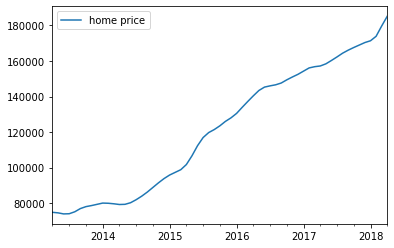

In [32]:
lake_worth_pct.plot();

In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
adfuller(lake_worth_pct)

(0.2938076760562932,
 0.9770585958296852,
 5,
 55,
 {'1%': -3.5552728880540942,
  '5%': -2.9157312396694217,
  '10%': -2.5956695041322315},
 774.90916954436)

In [35]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [36]:
cutoff = '2017-05'
train = lake_worth_pct[:cutoff]
test = lake_worth_pct[cutoff:]

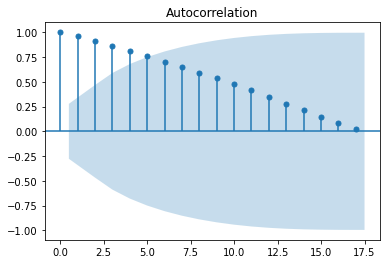

In [37]:
#Plot_acf is used to identify the q parameter
plot_acf(train);

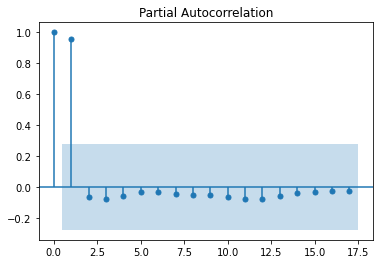

In [38]:
plot_pacf(train,method='ywm');

In [39]:
ar_1 = ARIMA(train, order=(0, 2, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
train_pred = ar_1.predict()

/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/johnnahra/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

np.sqrt(mean_squared_error(train, train_pred))

12400.606807693952

In [41]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             home price   No. Observations:                   50
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -384.264
Date:                Thu, 30 Mar 2023   AIC                            770.529
Time:                        00:25:37   BIC                            772.400
Sample:                    04-01-2013   HQIC                           771.236
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.254e+05      1e+05      5.238      0.000    3.29e+05    7.22e+05
===================================================================================
Ljung-Box (L1) (Q):                  11.27   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.00   Prob(JB):                         0.92
Heteroskedasticity (H):               1.23   Skew:                            -0.02
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
y_pred = ar_1.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ar_1.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

In [43]:
np.sqrt(mean_squared_error(test, y_pred_out))

4629.344806053372

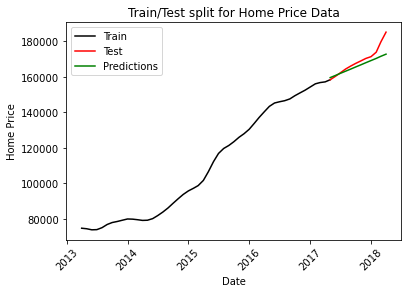

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(train, color = "black",label='Train')
plt.plot(test, color = "red",label='Test')
plt.ylabel('Home Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Home Price Data")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend();

Forecasted percent return in 2019: 5.41%
Forecasted percent return in 2021: 13.93%
Forecasted percent return in 2023: 22.44%


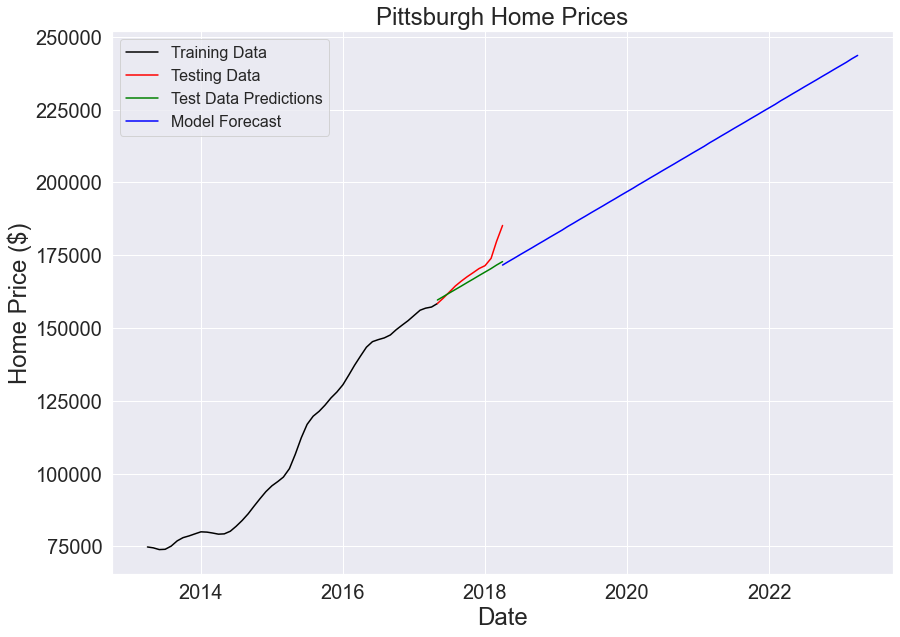

In [48]:
output = ar_1.predict(start='2018-04-01',end='2023-04-01')

import seaborn as sns
sns.set(font_scale = 1)

plt.figure(figsize=(14,10))
plt.plot(train, color = "black",label='Training Data')
plt.plot(test, color = "red",label='Testing Data')
plt.ylabel('Home Price ($)', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Pittsburgh Home Prices", fontsize=24)
plt.plot(y_pred_out, color='green', label = 'Test Data Predictions')
plt.plot(output, color='blue', label = 'Model Forecast')
plt.legend(fontsize=16);

pred1 = (np.mean(output[:12]))
pred3 = (np.mean(output[:36]))
pred5 = (np.mean(output[:60]))
actual = test['home price'].mean()
change1 = ((pred1-actual)/actual) * 100
change3 = ((pred3-actual)/actual) * 100
change5 = ((pred5-actual)/actual) * 100

print(f'Forecasted percent return in 2019: {round(change1, 2)}%')
print(f'Forecasted percent return in 2021: {round(change3, 2)}%')
print(f'Forecasted percent return in 2023: {round(change5, 2)}%')